<a href="https://colab.research.google.com/github/Adi15Jadhav/Deep_learning_assignments/blob/main/Customer_churn_data_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/churn_data.csv")
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df1 = df.drop('customerID',axis=1)
df1.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7043 non-null   int64  
 1   PhoneService      7043 non-null   object 
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 440.3+ KB


In [7]:
df1.isnull().sum()

tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
for i in df1.columns:
    print(i , df1[i].unique())

tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn ['No' 'Yes']


In [9]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

In [10]:
encoder = OrdinalEncoder()
encoder.fit(df1[['Contract','PaymentMethod']])
df1[['Contract','PaymentMethod']] = encoder.transform(df1[['Contract','PaymentMethod']])

In [11]:
df1.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,No,0.0,Yes,2.0,29.85,29.85,No
1,34,Yes,1.0,No,3.0,56.95,1889.5,No
2,2,Yes,0.0,Yes,3.0,53.85,108.15,Yes
3,45,No,1.0,No,0.0,42.30,1840.75,No
4,2,Yes,0.0,Yes,2.0,70.70,151.65,Yes


In [12]:
for i,v in enumerate(['PhoneService','PaperlessBilling','Churn']):
    df1[v] = pd.get_dummies(df1[v],prefix=v)

In [13]:
df1.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,1,0.0,0,2.0,29.85,29.85,1
1,34,0,1.0,1,3.0,56.95,1889.5,1
2,2,0,0.0,0,3.0,53.85,108.15,0
3,45,1,1.0,1,0.0,42.30,1840.75,1
4,2,0,0.0,0,2.0,70.70,151.65,0


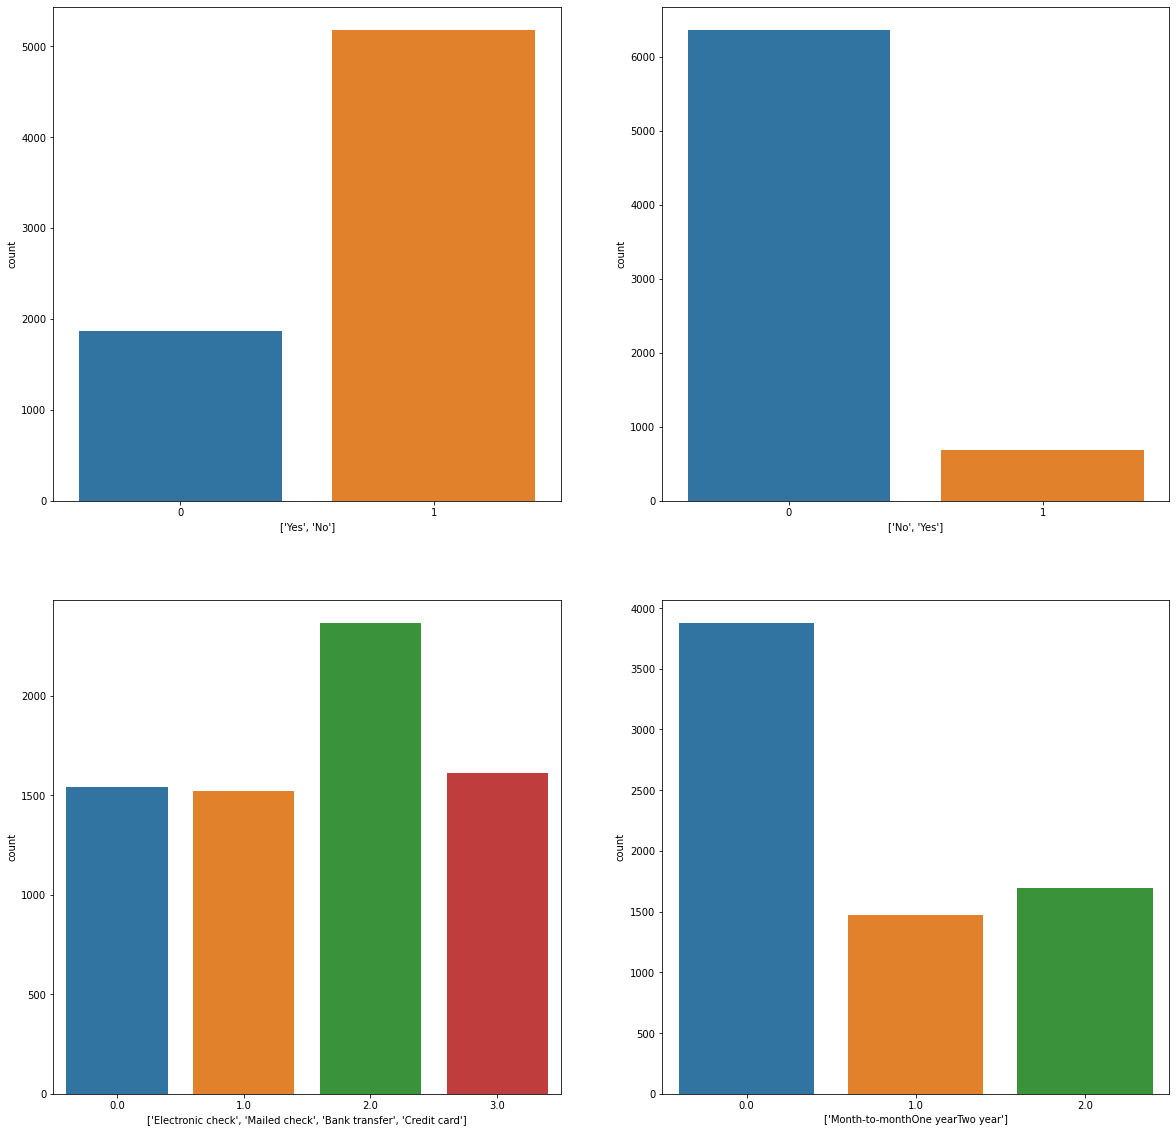

In [14]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.countplot(x= df1.Churn)
plt.xlabel(['Yes','No'])
plt.subplot(2,2,2)
sns.countplot(x= df1.PhoneService)
plt.xlabel(['No','Yes'])
plt.subplot(2,2,3)
sns.countplot(x= df1.PaymentMethod)
plt.xlabel(['Electronic check','Mailed check','Bank transfer','Credit card'])
plt.subplot(2,2,4)
sns.countplot(x= df1.Contract)
plt.xlabel(['Month-to-month' 'One year' 'Two year'])
plt.show()

In [15]:
df1.describe()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,0.096834,0.690473,0.407781,1.574329,64.761692,0.734630
std,24.559481,0.295752,0.833755,0.491457,1.068104,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,9.000000,0.000000,0.000000,0.000000,1.000000,35.500000,0.000000
50%,29.000000,0.000000,0.000000,0.000000,2.000000,70.350000,1.000000
75%,55.000000,0.000000,1.000000,1.000000,2.000000,89.850000,1.000000
max,72.000000,1.000000,2.000000,1.000000,3.000000,118.750000,1.000000


In [16]:
df1.TotalCharges.replace(r'^\s*$', np.nan, regex=True,inplace=True)

In [17]:
df1.isnull().sum()

tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
df1.dropna(inplace=True)

In [19]:

for i in df1.columns:
  df1[i] = df1[i].astype('float64')


In [20]:
X = df1.drop('Churn',axis=1)
y = df1[['Churn']]

In [21]:
y

,Churn
0,1.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
7038,1.0
7039,1.0
7040,1.0
7041,0.0


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [24]:
X_train.shape,y_train.shape

((4922, 7), (4922, 1))

In [25]:
import tensorflow as tf
from tensorflow import keras

In [26]:
model = keras.Sequential()

In [27]:
model.add(keras.layers.Dense(8,input_shape =(7,),activation='relu'))
model.add(keras.layers.Dense(4,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
154/154 [==============================] - 1s 1ms/step - loss: 48.2876 - accuracy: 0.5113
Epoch 2/10
154/154 [==============================] - 0s 1ms/step - loss: 1.5756 - accuracy: 0.6950
Epoch 3/10
154/154 [==============================] - 0s 1ms/step - loss: 0.7825 - accuracy: 0.7371
Epoch 4/10
154/154 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.7495
Epoch 5/10
154/154 [==============================] - 0s 1ms/step - loss: 0.6288 - accuracy: 0.7656
Epoch 6/10
154/154 [==============================] - 0s 1ms/step - loss: 0.7466 - accuracy: 0.7596
Epoch 7/10
154/154 [==============================] - 0s 1ms/step - loss: 0.6213 - accuracy: 0.7587
Epoch 8/10
154/154 [==============================] - 0s 1ms/step - loss: 0.5360 - accuracy: 0.7729
Epoch 9/10
154/154 [==============================] - 0s 1ms/step - loss: 0.6429 - accuracy: 0.7577
Epoch 10/10
154/154 [==============================] - 0s 1ms/step - loss: 0.5505 - accuracy: 0.776

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scale = StandardScaler()

In [32]:
scale.fit_transform(X_train)
scale.transform(X_test)

array([[-1.27679092, -0.33099571, -0.82377582, ...,  0.39647283,
        -1.47409441, -0.99678627],
       [-0.6646695 , -0.33099571, -0.82377582, ..., -0.54579625,
        -1.47576141, -0.86022192],
       [-1.27679092, -0.33099571, -0.82377582, ..., -0.54579625,
        -1.5024333 , -0.9971612 ],
       ...,
       [ 0.11068429, -0.33099571,  0.38080665, ..., -1.48806534,
         0.55797071,  0.23590985],
       [ 1.62058377, -0.33099571,  0.38080665, ..., -1.48806534,
        -1.38574376, -0.28992463],
       [ 1.21250283, -0.33099571,  1.58538911, ..., -1.48806534,
        -1.48576337, -0.4341641 ]])

In [33]:
model_2 = keras.Sequential()
model_2.add(keras.layers.Dense(8,input_shape =(7,),activation='relu'))
model_2.add(keras.layers.Dense(10,activation='relu'))
model_2.add(keras.layers.Dense(5,activation='relu'))
model_2.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
154/154 [==============================] - 1s 1ms/step - loss: 0.8482 - accuracy: 0.7539
Epoch 2/10
154/154 [==============================] - 0s 1ms/step - loss: 0.6069 - accuracy: 0.7724
Epoch 3/10
154/154 [==============================] - 0s 1ms/step - loss: 0.6192 - accuracy: 0.7670
Epoch 4/10
154/154 [==============================] - 0s 1ms/step - loss: 0.4917 - accuracy: 0.7730
Epoch 5/10
154/154 [==============================] - 0s 1ms/step - loss: 0.6012 - accuracy: 0.7653
Epoch 6/10
154/154 [==============================] - 0s 1ms/step - loss: 0.6084 - accuracy: 0.7786
Epoch 7/10
154/154 [==============================] - 0s 1ms/step - loss: 0.4905 - accuracy: 0.7737
Epoch 8/10
154/154 [==============================] - 0s 1ms/step - loss: 0.5095 - accuracy: 0.7769
Epoch 9/10
154/154 [==============================] - 0s 1ms/step - loss: 0.7200 - accuracy: 0.7540
Epoch 10/10
154/154 [==============================] - 0s 1ms/step - loss: 0.6305 - accuracy: 0.7603

In [36]:
model_3 = keras.Sequential()
model_3.add(keras.layers.Dense(8,input_shape =(7,),activation='relu'))
model_3.add(keras.layers.Dense(20,activation='relu'))
model_3.add(keras.layers.Dense(10,activation='relu'))
model_3.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
154/154 [==============================] - 1s 1ms/step - loss: 0.7687 - accuracy: 0.7568
Epoch 2/10
154/154 [==============================] - 0s 1ms/step - loss: 0.5067 - accuracy: 0.7796
Epoch 3/10
154/154 [==============================] - 0s 1ms/step - loss: 0.5299 - accuracy: 0.7780
Epoch 4/10
154/154 [==============================] - 0s 1ms/step - loss: 0.5259 - accuracy: 0.7663
Epoch 5/10
154/154 [==============================] - 0s 1ms/step - loss: 0.5100 - accuracy: 0.7826
Epoch 6/10
154/154 [==============================] - 0s 1ms/step - loss: 0.5806 - accuracy: 0.7710
Epoch 7/10
154/154 [==============================] - 0s 1ms/step - loss: 0.5804 - accuracy: 0.7766
Epoch 8/10
154/154 [==============================] - 0s 1ms/step - loss: 0.5697 - accuracy: 0.7563
Epoch 9/10
154/154 [==============================] - 0s 1ms/step - loss: 0.6552 - accuracy: 0.7713
Epoch 10/10
154/154 [==============================] - 0s 1ms/step - loss: 0.5888 - accuracy: 0.7503